# Preprocessing Continuous Variables

This tutorial will present various methods on how to preprocess continuous variables.

## Recap on UCI Breast Cancer Dataset (breast.data)

* Easy dataset to start off with
* Dataset contains all continuous variables, except one ID column, and one label (M, B) column
    * The continous variables are just statistics collected from a tumor's biopsy
    * More information can be found [here](https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.names)
* Goal of the dataset is to classify whether a tumor is maligant (M) or benigh (B)

In [1]:
prefix = "../datasets/"
import pandas as pd

df = pd.read_csv(prefix + "breast.data", header=None)

In [2]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
df.drop(0, axis=1, inplace=True)

# Shuffling dataset
import numpy as np
perm = np.random.permutation(len(df))
df = df.iloc[perm]

# Creating features and response variable set
y = df[1]
X = df.drop(1, axis=1)

In [4]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [5]:
predictions = SVC().fit(X_train, y_train).predict(X_test)
non_scale_accuracy = accuracy_score(y_test, predictions)
print "Accuracy of SVM: ", non_scale_accuracy

predictions = LogisticRegression().fit(X_train, y_train).predict(X_test)
non_scale_accuracy = accuracy_score(y_test, predictions)
print "Accuracy of Logistic Regression: ", non_scale_accuracy

Accuracy of SVM:  0.713286713287
Accuracy of Logistic Regression:  0.944055944056


## Improving the classification rate by feature engineering

In general, we're not getting the bang for our buck using the support vector machine. And it's because we're not preprocessing the continuous features correctly.

A variety of ways to improve model accuracy with continuous features

* Feature scaling
    * Standard scaling: For each continuous feature, $\mu = 0$ and $\sigma = 1$
    * Simple scaling: Scale all continuous features between the range $[0, 1]$ or $[-1, 1]$.
* Univariate feature selection
    * Univariate feature selection using $p$-values
    * Correlation based feature selection using Spearman Rho or Kendall Tau

## Part 1: Feature scaling

* Idea is that continuous features can take anywhere in a certain range; need a way to shrink (or inflate) everything
* Reduce the variation in the dataset using scaling.
* **Standard scaling** applies the following formula to transform a feature into a space with mean 0 and standard deviation 1. This is also called "recentering" the dataset.

    Given the $i$th continuous feature $X_i$, we apply the following formula for each $x \in X_i$:
    $$x' = \frac{x - \bar{X_i}}{\sigma_{X_i}}$$
    where $\bar{X_i}$ is the mean of feature $X_i$ and $\sigma_{X_i}$ is its standard deviation. Our new dataset composed of $x'$ will have mean 0 and standard deviation 1.
* **Min-max scaling** applies the following formula to shrink (or inflate) features into a space between a given interval. If we want our features to lie within the interval [0, 1], the following formula would work.
    $$x' = \frac{x - \min(X_i)}{\max(X_i) - \min(X_i)}$$

* More information on [Wikipedia](https://en.wikipedia.org/wiki/Feature_scaling)

In [6]:
X.head()

,2,3,4,5,6,7,8,9,10,11,...,22,23,24,25,26,27,28,29,30,31
152,9.731,15.34,63.78,300.2,0.10720,0.15990,0.41080,0.07857,0.2548,0.09296,...,11.02,19.49,71.04,380.5,0.12920,0.27720,0.82160,0.15710,0.3108,0.12590
26,14.580,21.53,97.41,644.8,0.10540,0.18680,0.14250,0.08783,0.2252,0.06924,...,17.62,33.21,122.40,896.9,0.15250,0.66430,0.55390,0.27010,0.4264,0.12750
184,15.280,22.41,98.92,710.6,0.09057,0.10520,0.05375,0.03263,0.1727,0.06317,...,17.80,28.03,113.80,973.1,0.13010,0.32990,0.36300,0.12260,0.3175,0.09772
38,14.990,25.20,95.54,698.8,0.09387,0.05131,0.02398,0.02899,0.1565,0.05504,...,14.99,25.20,95.54,698.8,0.09387,0.05131,0.02398,0.02899,0.1565,0.05504
482,13.470,14.06,87.32,546.3,0.10710,0.11550,0.05786,0.05266,0.1779,0.06639,...,14.83,18.32,94.94,660.2,0.13930,0.24990,0.18480,0.13350,0.3227,0.09326


In [7]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# I want to show that SVMs are sensitive to feature scaling.
# In partcular, because sklearn.svm.SVC uses the RBF kernel, this kernel
# is sensitive to scaling.
#
# More information on how to properly train an SVM is here:
#    http://www.csie.ntu.edu.tw/~cjlin/papers/guide/guide.pdf

for Scaler in [StandardScaler, MinMaxScaler]:
    
    # "Scaler" is a class object whose constructor and attributes we can call
    scaler = Scaler()
    scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    
    svm = SVC().fit(X_train_scaled, y_train)
    
    X_test_scaled = scaler.transform(X_test)  # Note we don't "refit" for testing data
    predictions = svm.predict(X_test_scaled)
    print "Accuracy of SVM using {0}: {1}".format(Scaler.__name__, accuracy_score(y_test, predictions))
    

Accuracy of SVM using StandardScaler: 0.986013986014
Accuracy of SVM using MinMaxScaler: 0.958041958042


## Part 2: Feature Selection
    
Idea is that we have all of these continuous attributes.... who is to say that any of them are useful?

The full Scikit-Learn module on feature selection is presented [here](http://scikit-learn.org/stable/modules/feature_selection.html).

## UCI Sonar Dataset

* The task is to train a classifier to discriminate between sonar signals bounced off a metal cylinder and those bounced off a roughly cylindrical rock. (From website.)
* More dataset description [here](https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.names)
* In general, this is one of my favorite datasets because the classification task is difficult

In [72]:
df = pd.read_csv(prefix + "sonar.data", header=None)

In [73]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [74]:
# The class labels (R, M) are not shuffled, so we have to shuffle them
import numpy as np
perm = np.random.permutation(len(df))
df = df.loc[perm]

In [75]:
X = df.drop(60, axis=1)
y = df[60]  # Rock or mine class label

In [76]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
56,0.0152,0.0102,0.0113,0.0263,0.0097,0.0391,0.0857,0.0915,0.0949,0.1504,...,0.0048,0.0049,0.0041,0.0036,0.0013,0.0046,0.0037,0.0011,0.0034,0.0033
24,0.0293,0.0644,0.0390,0.0173,0.0476,0.0816,0.0993,0.0315,0.0736,0.0860,...,0.0170,0.0035,0.0052,0.0083,0.0078,0.0075,0.0105,0.0160,0.0095,0.0011
42,0.0211,0.0319,0.0415,0.0286,0.0121,0.0438,0.1299,0.1390,0.0695,0.0568,...,0.0053,0.0090,0.0042,0.0153,0.0106,0.0020,0.0105,0.0049,0.0070,0.0080
54,0.0132,0.0080,0.0188,0.0141,0.0436,0.0668,0.0609,0.0131,0.0899,0.0922,...,0.0136,0.0044,0.0028,0.0021,0.0022,0.0048,0.0138,0.0140,0.0028,0.0064
67,0.0368,0.0403,0.0317,0.0293,0.0820,0.1342,0.1161,0.0663,0.0155,0.0506,...,0.0058,0.0091,0.0160,0.0160,0.0081,0.0070,0.0135,0.0067,0.0078,0.0068


In [77]:
# As a baseline, let's classify this with Logistic Regression, no scaling

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [78]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
152,0.0131,0.0201,0.0045,0.0217,0.0230,0.0481,0.0742,0.0333,0.1369,0.2079,...,0.0111,0.0168,0.0086,0.0045,0.0062,0.0065,0.0030,0.0066,0.0029,0.0053
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
185,0.0340,0.0625,0.0381,0.0257,0.0441,0.1027,0.1287,0.1850,0.2647,0.4117,...,0.0329,0.0141,0.0019,0.0067,0.0099,0.0042,0.0057,0.0051,0.0033,0.0058
155,0.0211,0.0128,0.0015,0.0450,0.0711,0.1563,0.1518,0.1206,0.1666,0.1345,...,0.0174,0.0117,0.0023,0.0047,0.0049,0.0031,0.0024,0.0039,0.0051,0.0015
163,0.0072,0.0027,0.0089,0.0061,0.0420,0.0865,0.1182,0.0999,0.1976,0.2318,...,0.0092,0.0078,0.0071,0.0081,0.0034,0.0064,0.0037,0.0036,0.0012,0.0037


In [79]:
predictions = LogisticRegression().fit(X_train, y_train).predict(X_test)
print "Accuracy of Logistic Regression: ", accuracy_score(predictions, y_test)

Accuracy of Logistic Regression:  0.75


In [89]:
# Overall, want to see if univariate feature selection works with this dataset...

In [94]:
from sklearn.feature_selection import SelectPercentile, f_classif

transform = SelectPercentile(score_func=f_classif)
percentiles = (1, 3, 6, 10, 15, 20, 30, 40, 60, 80, 100)
for percentile in percentiles:
    transform.set_params(percentile=percentile)
    
    X_train_altered = transform.fit_transform(X_train, y_train)
    X_test_altered = transform.transform(X_test)
    
    predictions = LogisticRegression().fit(X_train_altered, y_train).predict(X_test_altered)
    print "Accuracy of Logistic Regression: ", accuracy_score(predictions, y_test), "\t shape is ", X_test_altered.shape

Accuracy of Logistic Regression:  0.807692307692 	 shape is  (52, 1)
Accuracy of Logistic Regression:  0.807692307692 	 shape is  (52, 2)
Accuracy of Logistic Regression:  0.711538461538 	 shape is  (52, 4)
Accuracy of Logistic Regression:  0.730769230769 	 shape is  (52, 6)
Accuracy of Logistic Regression:  0.730769230769 	 shape is  (52, 9)
Accuracy of Logistic Regression:  0.75 	 shape is  (52, 12)
Accuracy of Logistic Regression:  0.75 	 shape is  (52, 18)
Accuracy of Logistic Regression:  0.807692307692 	 shape is  (52, 24)
Accuracy of Logistic Regression:  0.807692307692 	 shape is  (52, 36)
Accuracy of Logistic Regression:  0.846153846154 	 shape is  (52, 48)
Accuracy of Logistic Regression:  0.769230769231 	 shape is  (52, 60)


(52, 60)

https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test#Examples
http://scikit-learn.org/stable/auto_examples/feature_selection/plot_feature_selection.html
http://scikit-learn.org/stable/auto_examples/svm/plot_svm_anova.html

In [84]:
%matplotlib inline

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


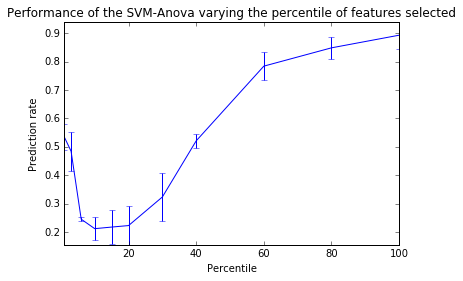

In [87]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets, feature_selection, cross_validation
from sklearn.pipeline import Pipeline

###############################################################################
# Import some data to play with
digits = datasets.load_digits()
y = digits.target
# Throw away data, to be in the curse of dimension settings
y = y[:200]
X = digits.data[:200]
n_samples = len(y)
X = X.reshape((n_samples, -1))
# add 200 non-informative features
X = np.hstack((X, 2 * np.random.random((n_samples, 200))))

###############################################################################
# Create a feature-selection transform and an instance of SVM that we
# combine together to have an full-blown estimator

transform = feature_selection.SelectPercentile(feature_selection.f_classif)

#clf = Pipeline([('anova', transform), ('svc', svm.SVC(C=1.0))])

###############################################################################
# Plot the cross-validation score as a function of percentile of features
score_means = list()
score_stds = list()
percentiles = (1, 3, 6, 10, 15, 20, 30, 40, 60, 80, 100)

for percentile in percentiles:
    
    transform.set_params(percentile=percentile)
    X_altered = transform.fit_transform(X, y)
    
    #clf.set_params(anova__percentile=percentile)
    # Compute cross-validation score using all CPUs
    this_scores = cross_validation.cross_val_score(svm.SVC(C=1.0), X_altered, y, n_jobs=1)
    score_means.append(this_scores.mean())
    score_stds.append(this_scores.std())

plt.errorbar(percentiles, score_means, np.array(score_stds))

plt.title(
    'Performance of the SVM-Anova varying the percentile of features selected')
plt.xlabel('Percentile')
plt.ylabel('Prediction rate')

plt.axis('tight')
plt.show()

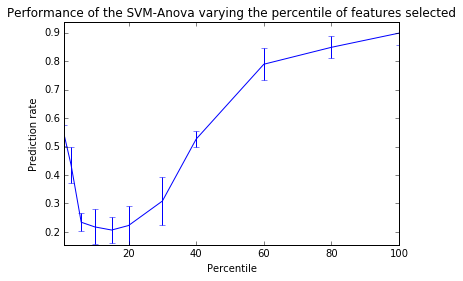

In [88]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets, feature_selection, cross_validation
from sklearn.pipeline import Pipeline

###############################################################################
# Import some data to play with
digits = datasets.load_digits()
y = digits.target
# Throw away data, to be in the curse of dimension settings
y = y[:200]
X = digits.data[:200]
n_samples = len(y)
X = X.reshape((n_samples, -1))
# add 200 non-informative features
X = np.hstack((X, 2 * np.random.random((n_samples, 200))))

###############################################################################
# Create a feature-selection transform and an instance of SVM that we
# combine together to have an full-blown estimator

transform = feature_selection.SelectPercentile(feature_selection.f_classif)

clf = Pipeline([('anova', transform), ('svc', svm.SVC(C=1.0))])

###############################################################################
# Plot the cross-validation score as a function of percentile of features
score_means = list()
score_stds = list()
percentiles = (1, 3, 6, 10, 15, 20, 30, 40, 60, 80, 100)

for percentile in percentiles:
    clf.set_params(anova__percentile=percentile)
    # Compute cross-validation score using all CPUs
    this_scores = cross_validation.cross_val_score(clf, X, y, n_jobs=1)
    score_means.append(this_scores.mean())
    score_stds.append(this_scores.std())

plt.errorbar(percentiles, score_means, np.array(score_stds))

plt.title(
    'Performance of the SVM-Anova varying the percentile of features selected')
plt.xlabel('Percentile')
plt.ylabel('Prediction rate')

plt.axis('tight')
plt.show()